# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

from datetime import datetime
import datetime as dt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor




import warnings
warnings.filterwarnings('ignore')


In [2]:
# read the dataset

df = pd.read_csv('SeoulBikeData.csv',encoding_errors='ignore') #other wise it is throwing utf error

In [3]:
df.head(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,1/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,1/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,1/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,1/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,1/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [5]:
df.shape # There are 14 features 

(8760, 14)

In [6]:
df.size

122640

In [7]:
df.dtypes

Date                         object
Rented Bike Count             int64
Hour                          int64
Temperature(C)              float64
Humidity(%)                   int64
Wind speed (m/s)            float64
Visibility (10m)              int64
Dew point temperature(C)    float64
Solar Radiation (MJ/m2)     float64
Rainfall(mm)                float64
Snowfall (cm)               float64
Seasons                      object
Holiday                      object
Functioning Day              object
dtype: object

In [8]:
df.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [9]:
df.dtypes #data type changed to date time

Date                         object
Rented Bike Count             int64
Hour                          int64
Temperature(C)              float64
Humidity(%)                   int64
Wind speed (m/s)            float64
Visibility (10m)              int64
Dew point temperature(C)    float64
Solar Radiation (MJ/m2)     float64
Rainfall(mm)                float64
Snowfall (cm)               float64
Seasons                      object
Holiday                      object
Functioning Day              object
dtype: object

In [10]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes



### Need to covert it in seprate day , month and year columns

In [11]:
# converting  the "Date" feature into three new features "year","month","day" 
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

In [12]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day_name()

In [13]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
df['weekend']=df['Day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','Day','year'],axis=1)

In [14]:
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


# Exploratory Data Analysis

## Exploring the Numerical VAriables

In [15]:
# Considering the numerical features first
numeric_features = df.describe().columns # because bydefault it includes all numerical features
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'month',
       'weekend'],
      dtype='object')

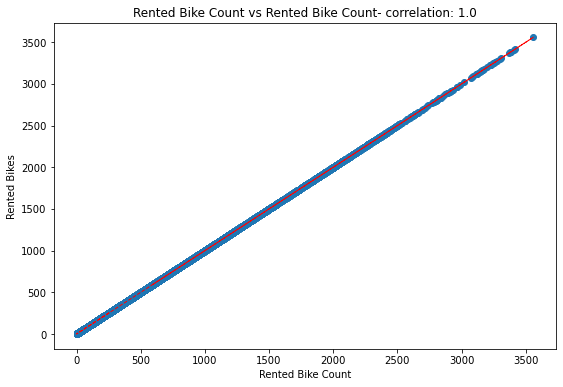

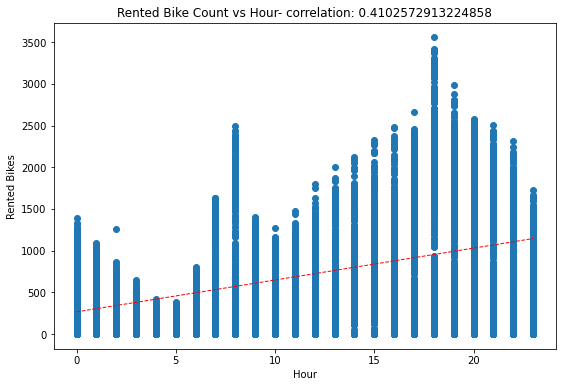

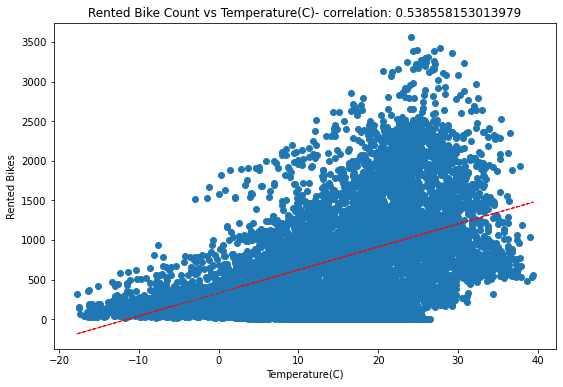

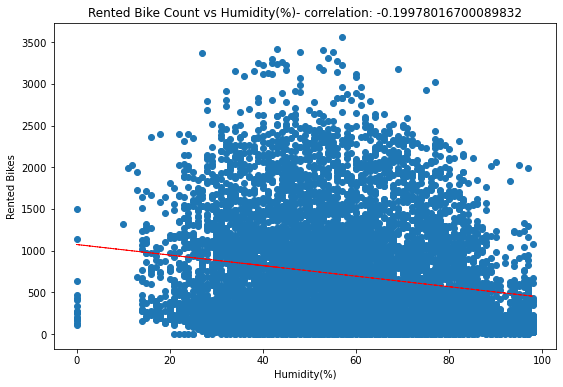

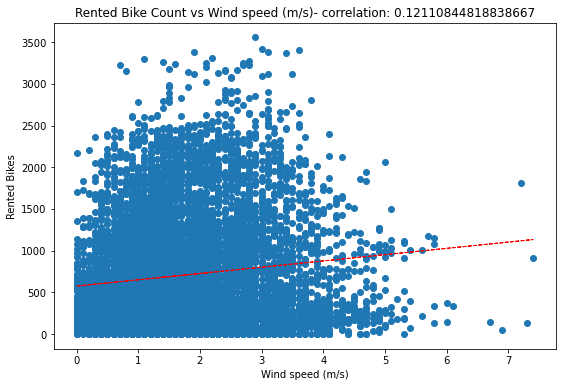

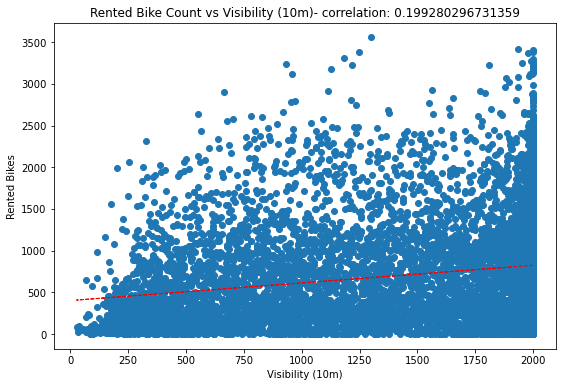

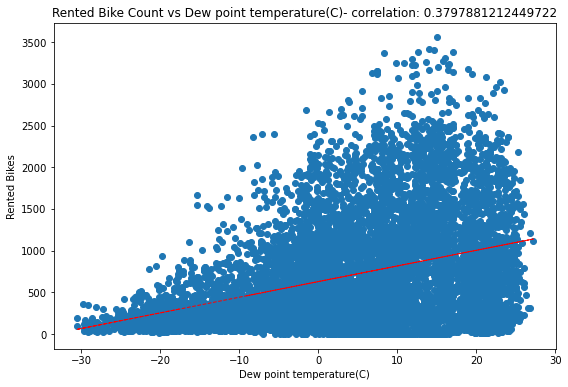

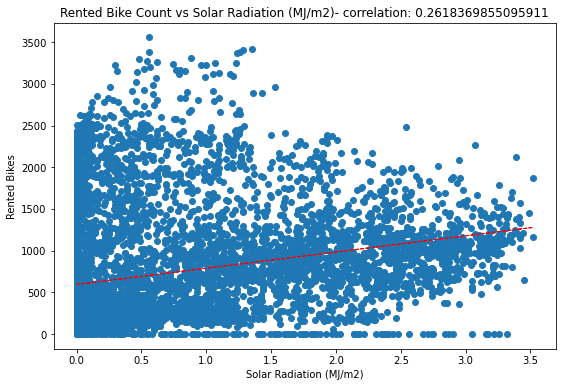

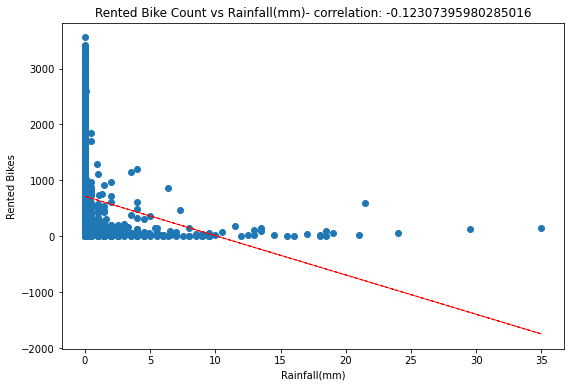

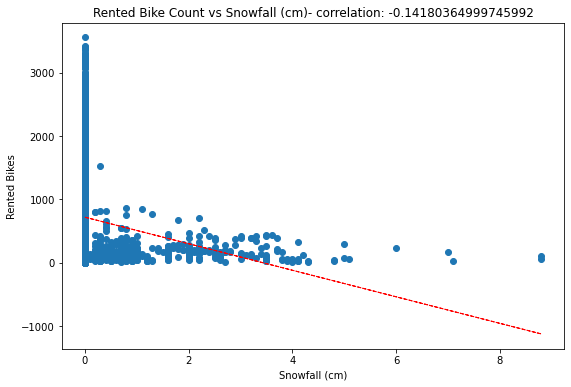

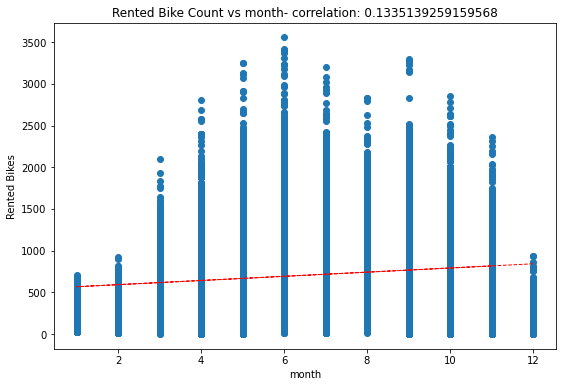

In [16]:
# visualising the relation between the dependent and independent variables
for col in numeric_features[:-1]: 
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bikes')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

### only the temperature and dew point temperature  is having linear relation with y

### Humidity is having weak negative correlation

### the solar irradiation feature is having waek possitive correlation

# now we will see the data distribution



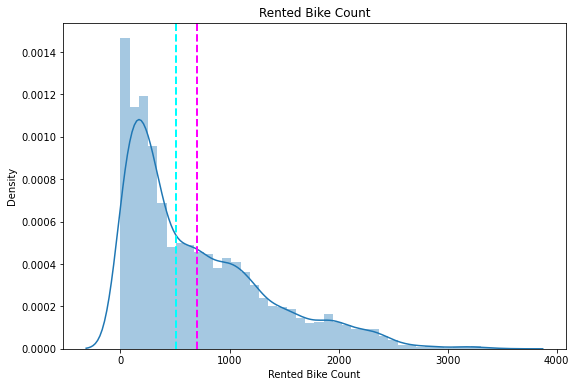

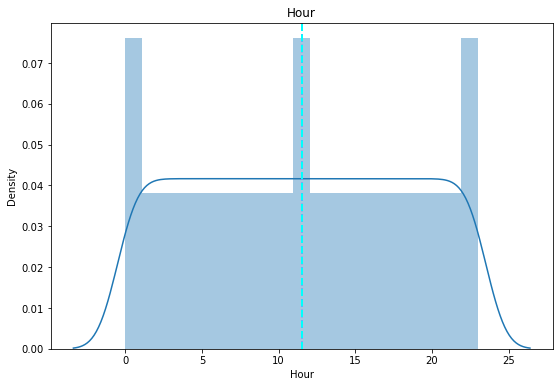

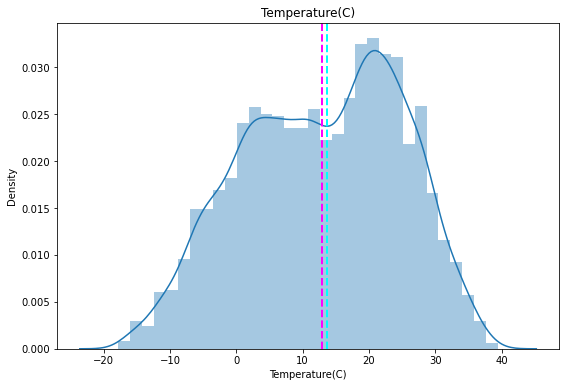

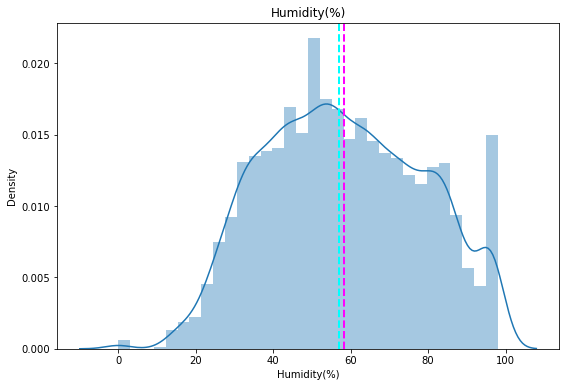

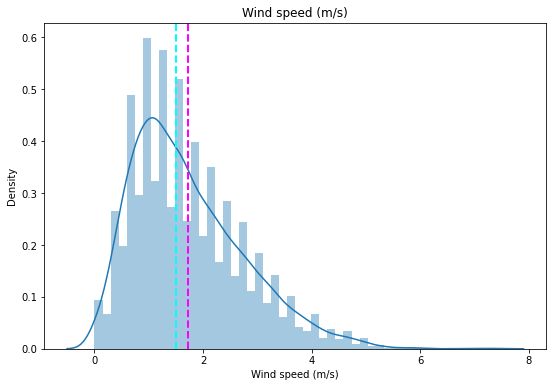

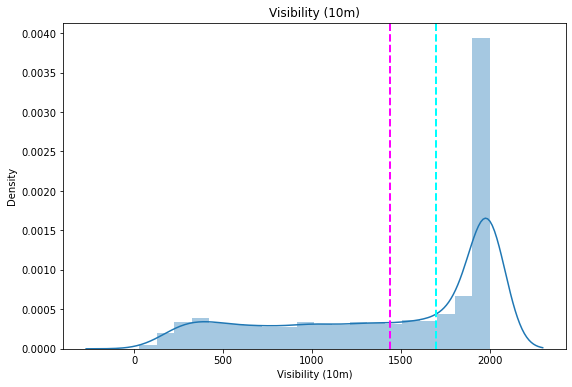

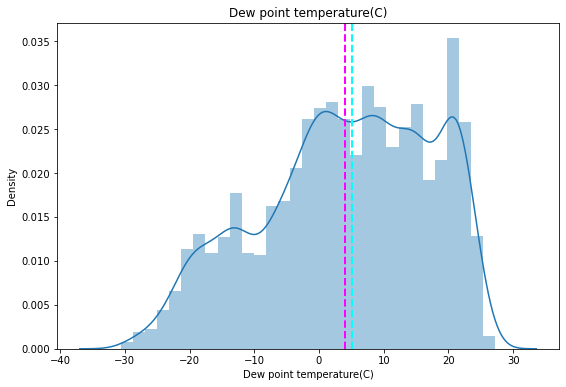

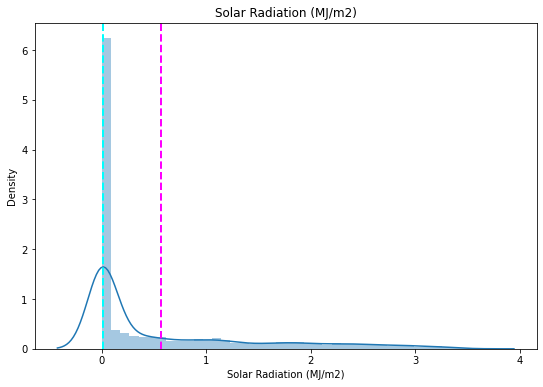

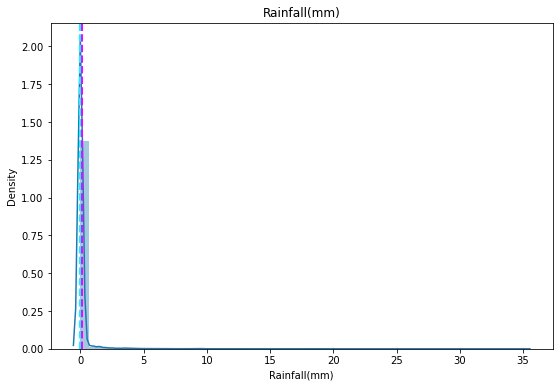

In [17]:
# plot a bar plot for each numerical feature 

for col in numeric_features[:-3]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca() #Get Current Axis GCA and GCF get current figure
    feature = df[col]
    sns.distplot(feature)
    #feature.distplot(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

# observations

#### the dependent feature rented Bike Count distribution is possitively skewed  and needs to transform to normal Distribution

#### the hour feature is normally distributed 

####  Temperature features follows almost normal distribution

#### Humidty is having normal distribution

#### Wind Speed feature is slightly possitively skewed

#### Visibility is negatively skewed

#### Dew Point Temperature is normally distributed ,slightly negatively skewed

#### rainfall follows the normal distribution , the mean and median values are almost same

### we need to convert the rented bike sinse the distribution is possitively skewed we can use various transformation techniques like
- log transfrom
- sqrt transfrom
- exponential transform
- box cox transfrom 
- inverse transform

### we need to check which transformation technique is suitable for out data feature Rented Bike Count  and we will plot the Q-Q plot to better visualise the distribution

## in two different ways we van convert them and visualise as shown below

- using hist or dist plot amd marking the mean and median

- using the Q-Q plot to better visualize

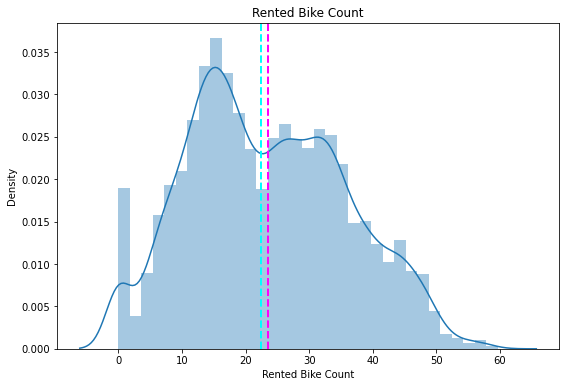

In [18]:
# 
fig = plt.figure(figsize=(9, 6))
ax = fig.gca() #Get Current Axia GCA and GCF get current figure
#feature = df[col]
sns.distplot(np.sqrt(df['Rented Bike Count']))
#feature.distplot(bins=50, ax = ax)
ax.axvline(np.sqrt(df['Rented Bike Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Rented Bike Count']).median(), color='cyan', linestyle='dashed', linewidth=2)    
ax.set_title('Rented Bike Count')
plt.show()

In [19]:
import scipy.stats as stat
import pylab 

In [20]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    #df[feature].hist()
    sns.distplot(df[feature])
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

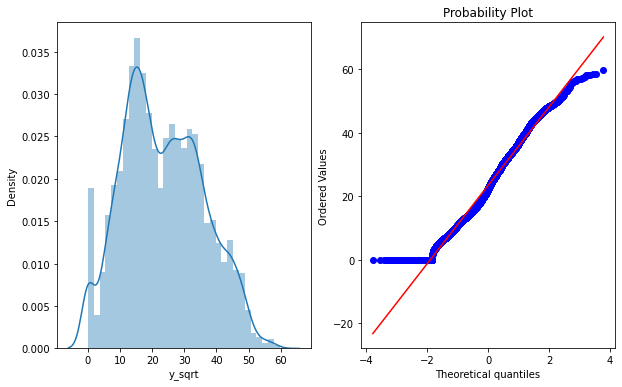

In [21]:
df['y_sqrt']=np.sqrt(df['Rented Bike Count'])
plot_data(df,'y_sqrt')

<AxesSubplot:xlabel='Rented Bike Count'>

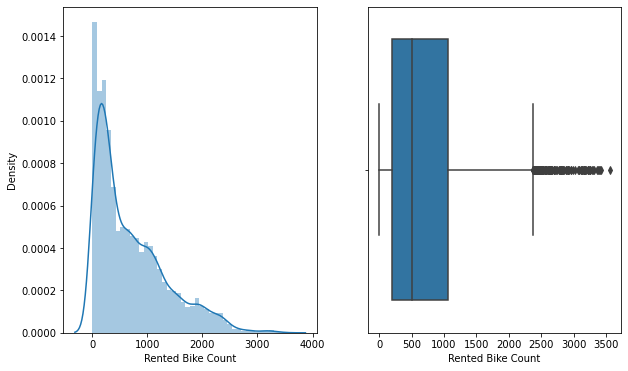

In [22]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(df['Rented Bike Count'])

plt.subplot(1,2,2)
sns.boxplot(df['Rented Bike Count'])





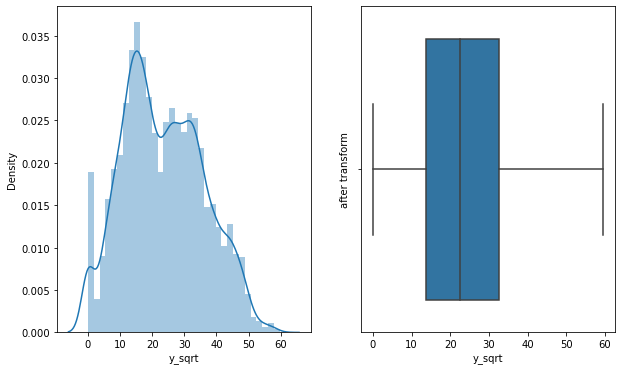

In [23]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.distplot(df['y_sqrt'])
plt.subplot(1,2,2)
plt.ylabel('after transform')
sns.boxplot(df['y_sqrt'])

plt.show()

## initially there were many outliers in the feature y and can be seen in the box plot and after transforming and converting it to noramal distribution the outliers are also removed 

## Univariate and Bivariate analysis 

<AxesSubplot:title={'center':'Monthly rented'}, xlabel='months', ylabel='Bikes Rented'>

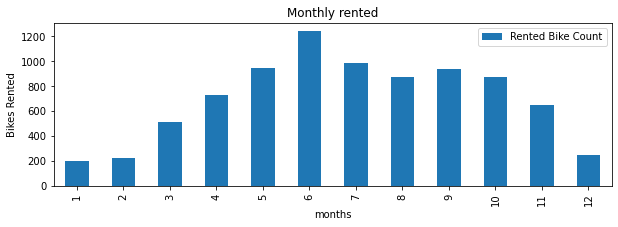

In [24]:
plt.figure(figsize=(10,3))
df.groupby('month').mean()['Rented Bike Count'].plot(kind='bar',legend=True,xlabel='months', ylabel='Bikes Rented', title='Monthly rented')

### from march to october there are high demand and from novemebr it starts contineously falling upto february that could be due to fall in temperature during this span, the irregular lines are probably because of outliers in the data

Seasons
Autumn    AxesSubplot(0.125,0.125;0.775x0.755)
Spring    AxesSubplot(0.125,0.125;0.775x0.755)
Summer    AxesSubplot(0.125,0.125;0.775x0.755)
Winter    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Rented Bike Count, dtype: object

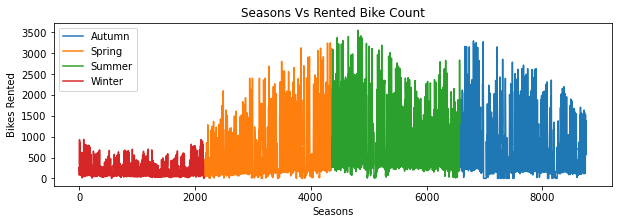

In [25]:
plt.figure(figsize=(10,3))
df.groupby('Seasons')['Rented Bike Count'].plot(legend=True,xlabel='Seasons', ylabel='Bikes Rented', title='Seasons Vs Rented Bike Count')

Seasons
Autumn    AxesSubplot(0.125,0.125;0.775x0.755)
Spring    AxesSubplot(0.125,0.125;0.775x0.755)
Summer    AxesSubplot(0.125,0.125;0.775x0.755)
Winter    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Temperature(C), dtype: object

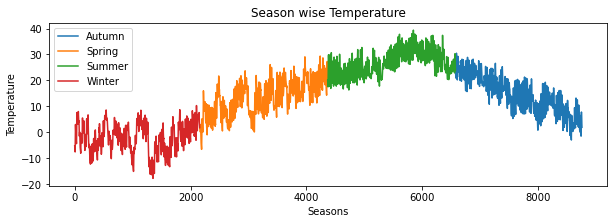

In [26]:
plt.figure(figsize=(10,3))

df.groupby('Seasons')['Temperature(C)'].plot(kind='line',legend=True,xlabel='Seasons', ylabel='Temperature', title='Season wise Temperature')

Seasons
Autumn    AxesSubplot(0.125,0.125;0.775x0.755)
Spring    AxesSubplot(0.125,0.125;0.775x0.755)
Summer    AxesSubplot(0.125,0.125;0.775x0.755)
Winter    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Snowfall (cm), dtype: object

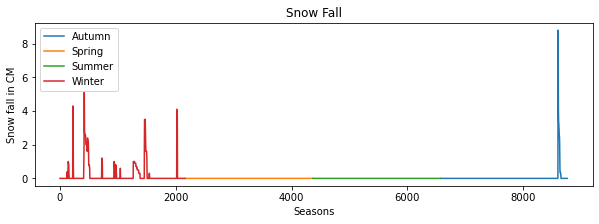

In [27]:
plt.figure(figsize=(10,3))

df.groupby('Seasons')['Snowfall (cm)'].plot(legend=True,xlabel='Seasons', ylabel='Snow fall in CM', title='Snow Fall')

Holiday
Holiday       AxesSubplot(0.125,0.125;0.775x0.755)
No Holiday    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Rented Bike Count, dtype: object

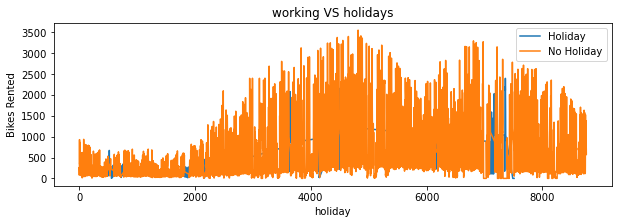

In [28]:
plt.figure(figsize=(10,3))

df.groupby('Holiday')['Rented Bike Count'].plot(legend=True,xlabel='holiday', ylabel='Bikes Rented', title='working VS holidays')

<AxesSubplot:title={'center':'avg Bikes Rented/hour'}, xlabel='Hours', ylabel='Bikes Rented'>

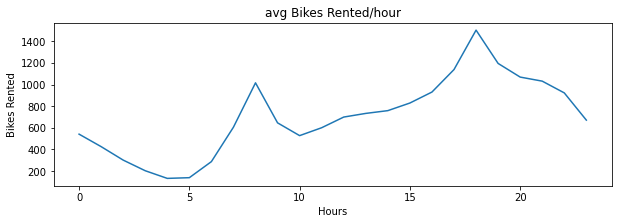

In [29]:
plt.figure(figsize=(10,3))

df.groupby('Hour').mean()['Rented Bike Count'].plot(kind='line',xlabel='Hours', ylabel='Bikes Rented', title='avg Bikes Rented/hour')

<AxesSubplot:title={'center':'Impact of Temperature'}, xlabel='Temperature(°C) ', ylabel='Avg Bikes Rented'>

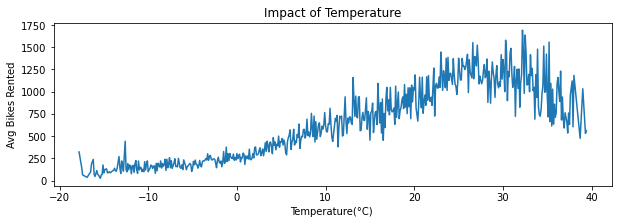

In [30]:
plt.figure(figsize=(10,3))
df.groupby('Temperature(C)').mean()['Rented Bike Count'].plot(kind='line',xlabel='Temperature(°C) ', ylabel='Avg Bikes Rented', title='Impact of Temperature')

<AxesSubplot:title={'center':'avg monthly rented'}, xlabel='Month ', ylabel='Avg Bikes Rented'>

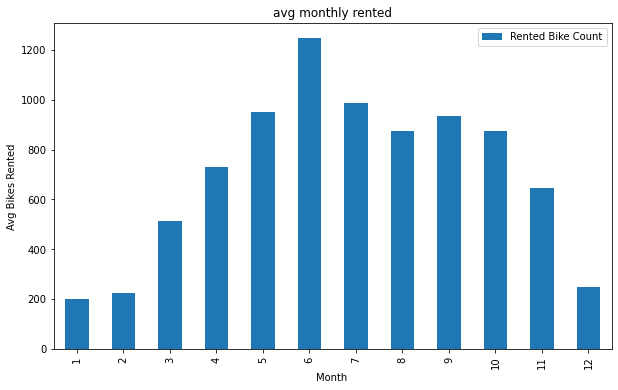

In [31]:
plt.figure(figsize=(10,6))

df.groupby('month')['Rented Bike Count'].mean().plot(kind='bar',legend=True,xlabel='Month ', ylabel='Avg Bikes Rented', title='avg monthly rented')

## In winter there were very few bikes rented may be because of very low temperature that leads to snowfall and can be seen in the above  figure that also shows snow fall in autumn and might be an outlier

### very few bikes rented on holidays

### the hourly plot shows peak time at morning 8 and evening 6 having maximum count



<AxesSubplot:xlabel='Humidity(%)'>

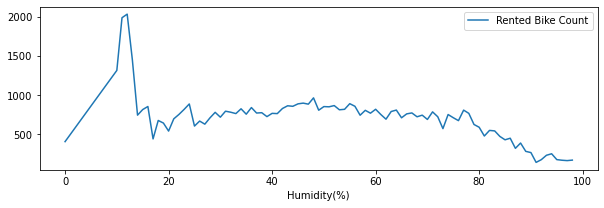

In [32]:
plt.figure(figsize=(10,3))

df.groupby('Humidity(%)').mean()['Rented Bike Count'].plot(legend=True)

### there is high demand when humidity is upto 20% and demand falls with rising humidity

<AxesSubplot:xlabel='Wind speed (m/s)'>

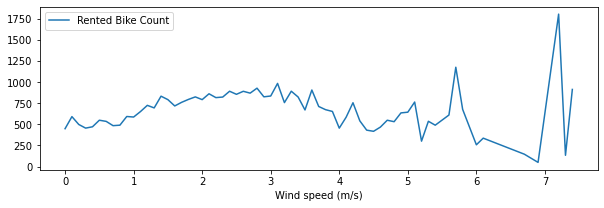

In [33]:
plt.figure(figsize=(10,3))

df.groupby('Wind speed (m/s)').mean()['Rented Bike Count'].plot(legend=True)

### there is significant fall with windspeed more than 6 m/s and there are very few bikes rented after wind speed exceeds 7 m/s

<AxesSubplot:xlabel='Dew point temperature(C)'>

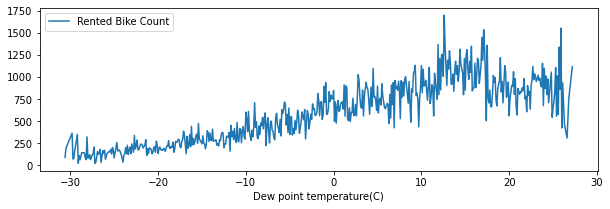

In [34]:
plt.figure(figsize=(10,3))

df.groupby('Dew point temperature(C)').mean()['Rented Bike Count'].plot(legend=True)

## There is increase in number of rented bike with increase in dew temperature

<AxesSubplot:xlabel='Rainfall(mm)'>

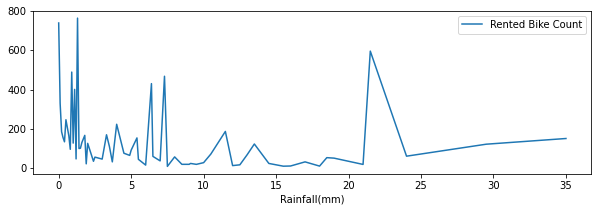

In [35]:
plt.figure(figsize=(10,3))

df.groupby('Rainfall(mm)').mean()['Rented Bike Count'].plot(kind='line',legend=True)

#### very few bikes rented with increasing rainfall

In [36]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'weekend', 'y_sqrt'],
      dtype='object')

In [37]:
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekend,y_sqrt
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0,15.937377
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0,14.282857
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0,13.152946
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0,10.344080
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0,8.831761


In [38]:
df['weekend'].value_counts()

0    6264
1    2496
Name: weekend, dtype: int64

In [39]:
df.corr()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekend,y_sqrt
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,1.335139e-01,-3.646741e-02,0.962137
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,1.749134e-15,-1.820420e-17,0.390103
Temperature(C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,2.161826e-01,7.214426e-03,0.539489
Humidity(%),-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,1.398748e-01,-1.695101e-02,-0.227313
Wind speed (m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-1.567102e-01,-2.222677e-02,0.112176
Visibility (10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,6.487420e-02,-2.676194e-02,0.203959
Dew point temperature(C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,2.425519e-01,-6.989598e-03,0.371053
Solar Radiation (MJ/m2),0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-3.159544e-02,1.297545e-02,0.303047
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,1.195810e-02,-1.415086e-02,-0.163535
Snowfall (cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,5.312091e-02,-6.758558e-03,-0.155086


<AxesSubplot:>

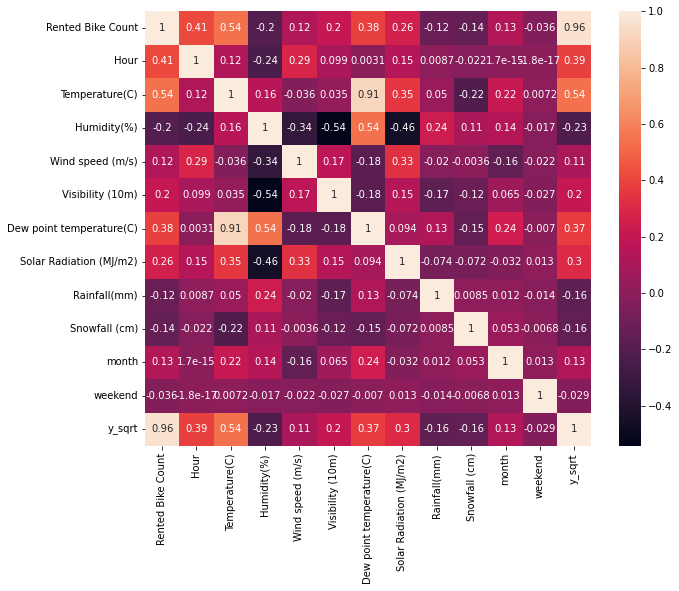

In [40]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(),annot=True)

### the features like hour , temperature ,dew point temperature shows high corelation with target variable but they are highly correlated so we will drop the dew_point _temperature
### visibility , humidty, solar radiation is having slight multicollinearity 

In [41]:
df.drop('Dew point temperature(C)',axis=1,inplace=True)

In [42]:
## calculating the Variance inflation factor

#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [43]:
calc_vif(df[[i for i in df.describe().columns if i not in ['year','y_sqrt','Rented Bike Count']]])

,variables,VIF
0,Hour,3.960112
1,Temperature(C),3.288623
2,Humidity(%),6.155420
3,Wind speed (m/s),4.651787
4,Visibility (10m),5.359009
5,Solar Radiation (MJ/m2),2.260940
6,Rainfall(mm),1.080309
7,Snowfall (cm),1.131108
8,month,5.009301
9,weekend,1.380635


#### # the final selected numerical features are 

In [44]:
numeric_features=['Humidity(%)','Wind speed (m/s)','Temperature(C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Visibility (10m)']

## Exploring the categorical Variables

In [45]:
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

<AxesSubplot:xlabel='Seasons', ylabel='Rented Bike Count'>

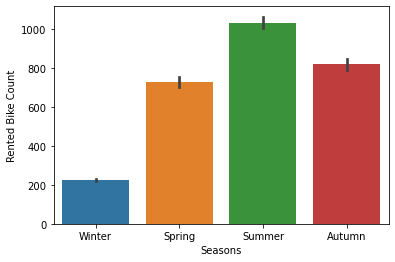

In [46]:
sns.barplot(x='Seasons',y='Rented Bike Count',data=df)

## the summer season has maximum rented bike count whereas the winter becasue of extremely low temperature is having less rented bikes 

In [47]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

<AxesSubplot:xlabel='Functioning Day', ylabel='Rented Bike Count'>

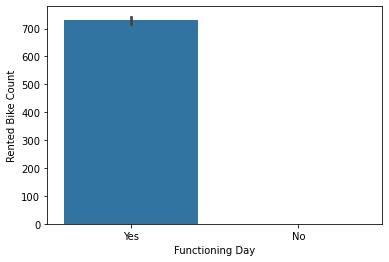

In [48]:
sns.barplot(x='Functioning Day',y='Rented Bike Count',data=df)

<AxesSubplot:xlabel='Seasons', ylabel='count'>

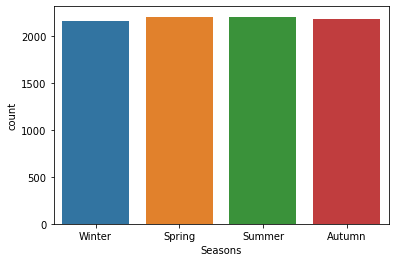

In [49]:
sns.countplot(df.Seasons)

In [50]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

<AxesSubplot:xlabel='Holiday', ylabel='count'>

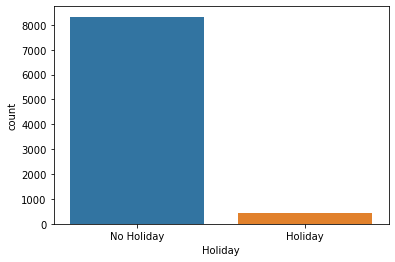

In [51]:
sns.countplot(df.Holiday)

### the most bikes rented on working days

In [52]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [53]:

df["month"]=df["month"].astype(np.object)
df["Hour"]=df["Hour"].astype(np.object) # R & D for hour as categorical variable
df["weekend"]=df["weekend"].astype(np.object)

print(df.dtypes)

Rented Bike Count            int64
Hour                        object
Temperature(C)             float64
Humidity(%)                  int64
Wind speed (m/s)           float64
Visibility (10m)             int64
Solar Radiation (MJ/m2)    float64
Rainfall(mm)               float64
Snowfall (cm)              float64
Seasons                     object
Holiday                     object
Functioning Day             object
month                       object
weekend                     object
y_sqrt                     float64
dtype: object


In [54]:
# to get the categorical variables

cat_var=list(df.describe(include=['object','category']).columns)
cat_var=['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'month','weekend']

In [55]:
cat_var

['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'month', 'weekend']

In [56]:
df[cat_var]

,Hour,Seasons,Holiday,Functioning Day,month,weekend
0,0,Winter,No Holiday,Yes,12,0
1,1,Winter,No Holiday,Yes,12,0
2,2,Winter,No Holiday,Yes,12,0
3,3,Winter,No Holiday,Yes,12,0
4,4,Winter,No Holiday,Yes,12,0
...,...,...,...,...,...,...
8755,19,Autumn,No Holiday,Yes,11,0
8756,20,Autumn,No Holiday,Yes,11,0
8757,21,Autumn,No Holiday,Yes,11,0
8758,22,Autumn,No Holiday,Yes,11,0


In [57]:
## Converting the categorical features using pandas get dummies method

In [58]:
df1=pd.get_dummies(df[cat_var],drop_first=True)



In [59]:
df1

,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekend_1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8757,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [60]:
df[numeric_features].columns

Index(['Humidity(%)', 'Wind speed (m/s)', 'Temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Visibility (10m)'],
      dtype='object')

In [61]:
df1.columns

Index(['Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7',
       'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13',
       'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19',
       'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday',
       'Functioning Day_Yes', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'weekend_1'],
      dtype='object')

In [62]:
y=df['y_sqrt'] # Dependent variable

In [63]:
df2=df[numeric_features]
df2.columns

Index(['Humidity(%)', 'Wind speed (m/s)', 'Temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Visibility (10m)'],
      dtype='object')

In [64]:
# we will concat this to the df2 

df2=pd.concat([df2[numeric_features],df1],axis=1)

In [65]:
df2.columns # these are the final independent features for building model

Index(['Humidity(%)', 'Wind speed (m/s)', 'Temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Visibility (10m)', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5',
       'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday',
       'Functioning Day_Yes', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'weekend_1'],
      dtype='object')

In [66]:
numeric_features.extend(df1.columns) #combining categorical and numerical features

In [67]:
final_features=numeric_features # the final set of features
final_features

['Humidity(%)',
 'Wind speed (m/s)',
 'Temperature(C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Visibility (10m)',
 'Hour_1',
 'Hour_2',
 'Hour_3',
 'Hour_4',
 'Hour_5',
 'Hour_6',
 'Hour_7',
 'Hour_8',
 'Hour_9',
 'Hour_10',
 'Hour_11',
 'Hour_12',
 'Hour_13',
 'Hour_14',
 'Hour_15',
 'Hour_16',
 'Hour_17',
 'Hour_18',
 'Hour_19',
 'Hour_20',
 'Hour_21',
 'Hour_22',
 'Hour_23',
 'Seasons_Spring',
 'Seasons_Summer',
 'Seasons_Winter',
 'Holiday_No Holiday',
 'Functioning Day_Yes',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12',
 'weekend_1']

In [68]:
y.dropna(inplace=True)

In [69]:
y.isnull().sum()

0

In [70]:
y

0       15.937377
1       14.282857
2       13.152946
3       10.344080
4        8.831761
          ...    
8755    31.670175
8756    27.640550
8757    26.343880
8758    26.683328
8759    24.166092
Name: y_sqrt, Length: 8760, dtype: float64

In [71]:
y.shape

(8760,)

In [72]:
x=df2

In [73]:
x

,Humidity(%),Wind speed (m/s),Temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Visibility (10m),Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekend_1
0,37,2.2,-5.2,0.0,0.0,0.0,2000,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,38,0.8,-5.5,0.0,0.0,0.0,2000,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,39,1.0,-6.0,0.0,0.0,0.0,2000,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,40,0.9,-6.2,0.0,0.0,0.0,2000,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,36,2.3,-6.0,0.0,0.0,0.0,2000,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,34,2.6,4.2,0.0,0.0,0.0,1894,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8756,37,2.3,3.4,0.0,0.0,0.0,2000,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8757,39,0.3,2.6,0.0,0.0,0.0,1968,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8758,41,1.0,2.1,0.0,0.0,0.0,1859,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [74]:
x.columns

Index(['Humidity(%)', 'Wind speed (m/s)', 'Temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Visibility (10m)', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5',
       'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday',
       'Functioning Day_Yes', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'weekend_1'],
      dtype='object')

In [75]:
ds = x.isin([np.inf, -np.inf]).sum().sum() # checking the inf values
print(ds)

0


## Splitting the data into train and test set

In [76]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.25, random_state = 0) 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6570, 47)
(2190, 47)
(6570,)
(2190,)


## we will first build the model using linear regression algorithm 

# Linear Regression

In [308]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [309]:
reg.fit(x_train,y_train)

LinearRegression()

In [310]:
reg.score(x_train, y_train)

0.7722101548255267

In [311]:
y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

In [312]:
from sklearn.metrics import mean_absolute_error

print('Performance metrics for train data Linear Regressions are:')
lr_MAE=mean_absolute_error(y_train,y_pred_train)
print('MAE',lr_MAE)
lr_MSE=mean_squared_error(y_train,y_pred_train)
print('MSE',lr_MSE)

lr_RMSE=np.sqrt(mean_squared_error(y_train,y_pred_train))
print('RMSE',lr_RMSE)

lr_R_SQUARED=r2_score(y_train,y_pred_train)
print('lr_R_SQUARED',lr_R_SQUARED)




Performance metrics for train data Linear Regressions are:
MAE 4.474024092996802
MSE 35.07751288189293
RMSE 5.9226271942350825
lr_R_SQUARED 0.7722101548255267


In [313]:
# saving the info in a dataframe

lr_performance={'Model':'Linear regression',
               'MAE':round(lr_MAE,4),
               'MSE':round(lr_MSE,4),
               'RMSE':round(lr_RMSE,4),
               'R_SQUARED':round(lr_R_SQUARED,4)}

lr_performance

# Concerting it into the dataframe for train data 

train_metrics=pd.DataFrame(lr_performance,index=[0])
train_metrics

,Model,MAE,MSE,RMSE,R_SQUARED
0,Linear regression,4.474,35.0775,5.9226,0.7722


In [314]:
# for test data
print('Performance metrics for test data Linear Regressions are:')
lr_MAE=mean_absolute_error(y_test,y_pred_test)
print('MAE',lr_MAE)
lr_MSE=mean_squared_error(y_test,y_pred_test)
print('MSE',lr_MSE)

lr_RMSE=np.sqrt(mean_squared_error(y_test,y_pred_test))
print('RMSE',lr_RMSE)

lr_R_SQUARED=r2_score(y_test,y_pred_test)
print('lr_R_SQUARED',lr_R_SQUARED)

Performance metrics for test data Linear Regressions are:
MAE 4.410178475318135
MSE 33.27533089591823
RMSE 5.768477346398981
lr_R_SQUARED 0.7893518482962748


In [315]:
lr_performance={'Model':'Linear regression',
               'MAE':round(lr_MAE,4),
               'MSE':round(lr_MSE,4),
               'RMSE':round(lr_RMSE,4),
               'R_SQUARED':round(lr_R_SQUARED,4)}

lr_performance

# Concerting it into the dataframe for train data 

test_metrics=pd.DataFrame(lr_performance,index=[0])
test_metrics

,Model,MAE,MSE,RMSE,R_SQUARED
0,Linear regression,4.4102,33.2753,5.7685,0.7894


In [316]:
reg.coef_

array([-1.27236196e-01, -2.90122073e-02,  5.11538263e-01,  8.89701409e-01,
       -1.48171446e+00, -8.13629988e-02,  9.90615715e-04, -2.04211065e+00,
       -4.95822637e+00, -7.23630435e+00, -9.51882072e+00, -9.04457949e+00,
       -4.03213994e+00,  2.27462862e+00,  7.54438892e+00,  1.25491521e+00,
       -3.27047269e+00, -3.46014138e+00, -2.74135788e+00, -2.96341191e+00,
       -3.18317912e+00, -1.92136354e+00,  1.11918595e-01,  3.83216182e+00,
        1.02397844e+01,  6.78230326e+00,  6.08102846e+00,  6.20280481e+00,
        5.04597766e+00,  1.46736086e+00, -4.81648861e-01, -1.26348263e+00,
       -4.80391365e+00,  3.51130869e+00,  2.82758278e+01, -8.13449897e-01,
       -1.53946964e+00, -6.75094331e-01,  1.73291511e+00,  4.41327425e+00,
       -1.71047504e+00, -3.96628184e+00,  6.27209321e-01,  3.28833588e+00,
        2.63349995e+00,  2.07210333e+00, -1.42458875e+00])

## the R  squared values of both train and test data is 77% and 78% respectively hence we can say there is no overfitting or underfitting of the model

## Comparing the predicted and actual values of Y

In [317]:
y_pred_test

array([16.16457355, 22.81803818, 19.61285211, ..., 40.81315274,
        1.54093433, 31.70818986])

In [318]:
y_test

4059    17.888544
6914    24.083189
233     15.033296
982     12.845233
5967    25.416530
          ...    
475     13.784049
4732    17.804494
4958    31.874755
8244     0.000000
5246    37.815341
Name: y_sqrt, Length: 2190, dtype: float64

In [319]:
dff=pd.DataFrame({'actual':y_test,'predicted':y_pred_test})

In [320]:
dff

,actual,predicted
4059,17.888544,16.164574
6914,24.083189,22.818038
233,15.033296,19.612852
982,12.845233,16.136562
5967,25.416530,31.193902
...,...,...
475,13.784049,18.935253
4732,17.804494,20.233185
4958,31.874755,40.813153
8244,0.000000,1.540934


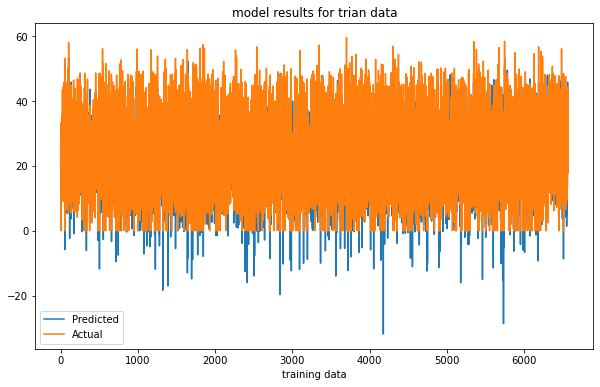

In [321]:
# plotting the actual and predicted values for the train data

plt.figure(figsize=(10,6))
plt.title('model results for trian data')
plt.plot(y_pred_train)
plt.plot(np.array(y_train))
plt.legend(["Predicted","Actual"])
plt.xlabel('training data')
plt.show()




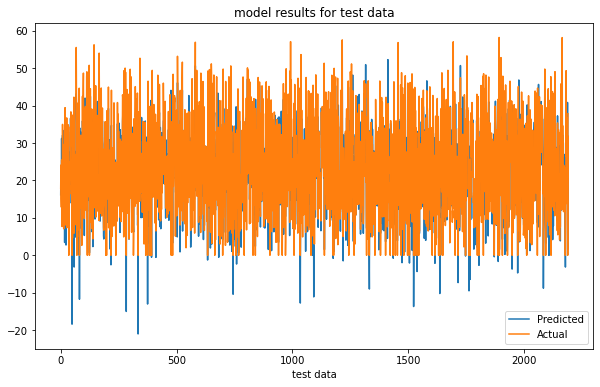

In [322]:
# plotting the actual and predicted values for test data set
plt.figure(figsize=(10,6))
plt.title('model results for test data')
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('test data')
plt.show()

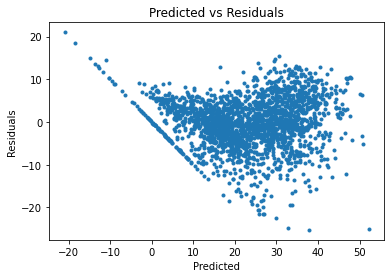

In [323]:
# homoscedasticity :A homoscedasticity plot is a graphical data analysis technique 
#it means the variance accross the regression line is same for all values of the predictor variable
plt.plot(y_pred_test,y_test-y_pred_test,'.')
plt.xlabel(r'Predicted')
plt.ylabel(r'Residuals')
plt.title('Predicted vs Residuals')
plt.tick_params(axis='x')
plt.tick_params(axis='y')

In [324]:
# we use cross val to capture more randomness within the data and then taking the average score

In [325]:
from sklearn.model_selection import cross_val_score

In [326]:
cross_val_score(LinearRegression(),x_train,y_train,cv=10)


array([0.76037839, 0.7727673 , 0.78657926, 0.75955373, 0.74934626,
       0.79044321, 0.77768982, 0.74230565, 0.74149531, 0.79052001])

In [327]:
score=cross_val_score(LinearRegression(),x_train,y_train)

score_lr=np.average(score)

In [328]:
score_lr #since our data has sufficient number of records so it is  still having  more or less same score

0.7675368471908856

## Regularisation : Ridge and Lasso


## Lasso Regression

In [329]:
from sklearn.linear_model import Lasso,Ridge

In [330]:
lasso = Lasso()
parameters = {'alpha':np.arange(0.1,2,0.2),'max_iter':np.arange(1000,3000,1000)}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]),
                         'max_iter': array([1000, 2000])},
             scoring='neg_mean_squared_error')

In [331]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1, 'max_iter': 1000}

Using  {'alpha': 0.1, 'max_iter': 1000}  the negative mean squared error is:  -42.10398726268425


In [332]:
# the best Grid Search CV returns the Best_parameter for lasso are 0.1 and 1000 iteration

lasso_regressor = Lasso(alpha=0.1,max_iter=1000)
lasso_regressor.fit(x_train,y_train)

Lasso(alpha=0.1)

In [333]:
lasso_y_pred_train = lasso_regressor.predict(x_train)
lasso_y_pred_test=lasso_regressor.predict(x_test)

In [334]:
print('Performance metrics for train data Lasso Regressions are:')
lasso_MAE=mean_absolute_error((y_train),(y_pred_train))
print('MAE',lasso_MAE)

lasso_MSE=mean_squared_error((y_train),(y_pred_train))
print('MSE',lasso_MSE)

lasso_RMSE=np.sqrt(mean_squared_error(y_test,y_pred_test))
print('RMSE',lasso_RMSE)

lasso_R_SQUARED=r2_score((y_train),(y_pred_train))
print('lasso_R_SQUARED',lasso_R_SQUARED)

Performance metrics for train data Lasso Regressions are:
MAE 4.474024092996802
MSE 35.07751288189293
RMSE 5.768477346398981
lasso_R_SQUARED 0.7722101548255267


In [335]:
lasso_performance={'Model':'Lasso regression',
                   'MAE':round(lasso_MAE,2),
               'MSE':round(lasso_MSE,2),
               'RMSE':round(lasso_RMSE,2),
               'R_SQUARED':round(lasso_R_SQUARED,2)}

#lasso_performance

# Concerting it into the dataframe for train data 

train_metrics=train_metrics.append(lasso_performance,ignore_index=True)


train_metrics.drop_duplicates(inplace=True)
train_metrics


,Model,MAE,MSE,RMSE,R_SQUARED
0,Linear regression,4.474,35.0775,5.9226,0.7722
1,Lasso regression,4.470,35.0800,5.7700,0.7700


In [336]:
print('Performance metrics for test data Lasso Regressions are:')
lasso_MAE=mean_absolute_error((y_test),(y_pred_test))
print('MAE',lasso_MAE)

lasso_MSE=mean_squared_error((y_test),(y_pred_test))
print('MSE',lasso_MSE)

#lasso_RMSE=np.sqrt(mean_squared_error(y_test,y_pred_test)
#print('RMSE',lasso_RMSE)

lasso_R_SQUARED=r2_score((y_test),(y_pred_test))
print('lasso_R_SQUARED',lasso_R_SQUARED)

Performance metrics for test data Lasso Regressions are:
MAE 4.410178475318135
MSE 33.27533089591823
lasso_R_SQUARED 0.7893518482962748


In [337]:
lasso_performance={'Model':'Lasso regression',
                   'MAE':round(lasso_MAE,4),
               'MSE':round(lasso_MSE,4),
               'RMSE':round(lasso_RMSE,4),
               'R_SQUARED':round(lasso_R_SQUARED,4)}

lasso_performance

# Concerting it into the dataframe for train data 

test_metrics=test_metrics.append(lasso_performance,ignore_index=True)
test_metrics.drop_duplicates(inplace=True)
test_metrics # same as linear reg

,Model,MAE,MSE,RMSE,R_SQUARED
0,Linear regression,4.4102,33.2753,5.7685,0.7894
1,Lasso regression,4.4102,33.2753,5.7685,0.7894


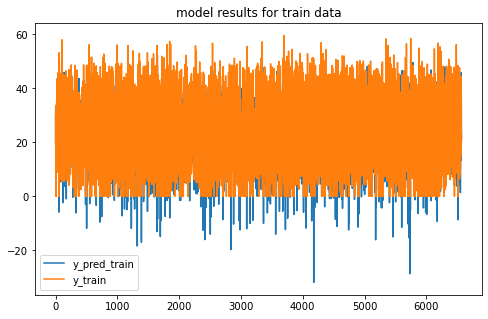

In [338]:
#plot for actual and predicted values
plt.figure(figsize=(8,5))
plt.title('model results for train data')
plt.plot((y_pred_train))
plt.plot(np.array((y_train)))
plt.legend(["y_pred_train","y_train"])
plt.show()

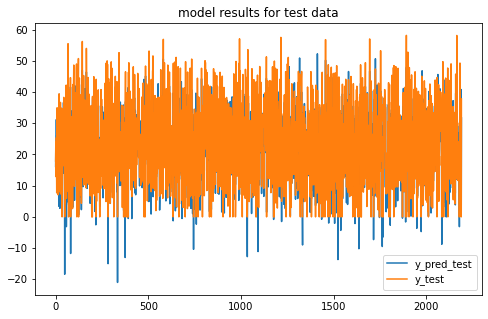

In [339]:
#plot for actual and predicted values
plt.figure(figsize=(8,5))
plt.title('model results for test data')
plt.plot((y_pred_test))
plt.plot(np.array((y_test)))
plt.legend(["y_pred_test","y_test"])
plt.show()

## Ridge regression

In [341]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': np.arange(0.1,2,0.2),'max_iter':np.arange(1000,3000,1000)}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]),
                         'max_iter': array([1000, 2000])},
             scoring='neg_mean_squared_error')

In [342]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1.3000000000000003, 'max_iter': 1000}

Using  {'alpha': 1.3000000000000003, 'max_iter': 1000}  the negative mean squared error is:  -35.65954018310652


In [343]:
# we will tune the hyperparameters as per he gridsearch cv best params
ridge_regressor = Lasso(alpha=1.3,max_iter=1000)
ridge_regressor.fit(x_train,y_train)

Lasso(alpha=1.3)

In [344]:
ridge_y_pred_train = ridge_regressor.predict(x_train)
ridge_y_pred_test=ridge_regressor.predict(x_test)

In [345]:
print('Performance metrics for train data ridge Regressions are:')
ridge_MAE=mean_absolute_error(y_train,y_pred_train)
print('MAE',ridge_MAE)
ridge_MSE=mean_squared_error(y_train,y_pred_train)
print('MSE',ridge_MSE)

ridge_RMSE=np.sqrt(mean_squared_error(y_train,y_pred_train))
print('RMSE',ridge_RMSE)

ridge_R_SQUARED=r2_score(y_train,y_pred_train)
print('R_SQUARED',ridge_R_SQUARED)

Performance metrics for train data ridge Regressions are:
MAE 4.474024092996802
MSE 35.07751288189293
RMSE 5.9226271942350825
R_SQUARED 0.7722101548255267


In [346]:
ridge_performance={'Model':'Ridge regression',
                   'MAE':round(ridge_MAE,4),
               'MSE':round(ridge_MSE,4),
               'RMSE':round(ridge_RMSE,4),
               'R_SQUARED':round(ridge_R_SQUARED,4)}

ridge_performance



train_metrics=train_metrics.append(ridge_performance,ignore_index=True)
train_metrics

,Model,MAE,MSE,RMSE,R_SQUARED
0,Linear regression,4.474,35.0775,5.9226,0.7722
1,Lasso regression,4.470,35.0800,5.7700,0.7700
2,Ridge regression,4.474,35.0775,5.9226,0.7722


In [347]:
print('Performance metrics for test data ridge Regressions are:')
ridge_MAE=mean_absolute_error(y_test,y_pred_test)
print('MAE',ridge_MAE)
ridge_MSE=mean_squared_error(y_test,y_pred_test)
print('MSE',ridge_MSE)

ridge_RMSE=np.sqrt(mean_squared_error(y_test,y_pred_test))
print('RMSE',ridge_RMSE)

ridge_R_SQUARED=r2_score(y_test,y_pred_test)
print('R_SQUARED',ridge_R_SQUARED)

Performance metrics for test data ridge Regressions are:
MAE 4.410178475318135
MSE 33.27533089591823
RMSE 5.768477346398981
R_SQUARED 0.7893518482962748


In [348]:
ridge_performance={'Model':'Ridge regression',
                   'MAE':round(ridge_MAE,4),
               'MSE':round(ridge_MSE,4),
               'RMSE':round(ridge_RMSE,4),
               'R_SQUARED':round(ridge_R_SQUARED,4)}

ridge_performance



test_metrics=test_metrics.append(ridge_performance,ignore_index=True)
test_metrics

,Model,MAE,MSE,RMSE,R_SQUARED
0,Linear regression,4.4102,33.2753,5.7685,0.7894
1,Lasso regression,4.4102,33.2753,5.7685,0.7894
2,Ridge regression,4.4102,33.2753,5.7685,0.7894


# we are getting almost same results in lasso and ridge and it obvious because a our model is not overfitting model 

## if it is overfitting then that can be addressed using regularization

### Elastics net

In [349]:
#import the packages
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
parameters = {'alpha': np.arange(0.1,2,0.2),'max_iter':np.arange(1000,3000,1000)}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error', cv=3)
elastic_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]),
                         'max_iter': array([1000, 2000])},
             scoring='neg_mean_squared_error')

In [350]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1, 'max_iter': 1000}

Using  {'alpha': 0.1, 'max_iter': 1000}  the negative mean squared error is:  -57.98501392204767


In [351]:
elastic_regressor=ElasticNet(alpha=0.1,max_iter=1000)

elastic_regressor.fit(x_train,y_train)

ElasticNet(alpha=0.1)

In [352]:
elastic_regressor.score(x_train, y_train)

0.6261195151259182

In [353]:
y_pred_train_en=elastic_regressor.predict(x_train)
y_pred_test_en=elastic_regressor.predict(x_test)

In [354]:
print('Performance metrics for train data elastic Regressions are:')
elastic_MAE=mean_absolute_error(y_train,y_pred_train)
print('MAE',elastic_MAE)
elastic_MSE=mean_squared_error(y_train,y_pred_train)
print('MSE',elastic_MSE)

elastic_RMSE=np.sqrt(mean_squared_error(y_train,y_pred_train))
print('RMSE',elastic_RMSE)

elastic_R_SQUARED=r2_score(y_train,y_pred_train)
print('R_SQUARED',elastic_R_SQUARED)

Performance metrics for train data elastic Regressions are:
MAE 4.474024092996802
MSE 35.07751288189293
RMSE 5.9226271942350825
R_SQUARED 0.7722101548255267


In [355]:
elastic_performance={'Model':'ElasticNet regression',
                   'MAE':round(elastic_MAE,4),
               'MSE':round(elastic_MSE,4),
               'RMSE':round(elastic_RMSE,4),
               'R_SQUARED':round(elastic_R_SQUARED,4)}

elastic_performance


train_metrics=train_metrics.append(elastic_performance,ignore_index=True)
train_metrics

,Model,MAE,MSE,RMSE,R_SQUARED
0,Linear regression,4.474,35.0775,5.9226,0.7722
1,Lasso regression,4.470,35.0800,5.7700,0.7700
2,Ridge regression,4.474,35.0775,5.9226,0.7722
3,ElasticNet regression,4.474,35.0775,5.9226,0.7722


In [356]:
print('Performance metrics for test data elastic Regressions are:')
elastic_MAE=mean_absolute_error(y_test,y_pred_test)
print('MAE',elastic_MAE)
elastic_MSE=mean_squared_error(y_test,y_pred_test)
print('MSE',elastic_MSE)

elastic_RMSE=np.sqrt(mean_squared_error(y_test,y_pred_test))
print('RMSE',elastic_RMSE)

elastic_R_SQUARED=r2_score(y_test,y_pred_test)
print('R_SQUARED',elastic_R_SQUARED)

Performance metrics for test data elastic Regressions are:
MAE 4.410178475318135
MSE 33.27533089591823
RMSE 5.768477346398981
R_SQUARED 0.7893518482962748


In [357]:
elastic_performance={'Model':'ElasticNet',
                   'MAE':round(elastic_MAE,4),
               'MSE':round(elastic_MSE,4),
               'RMSE':round(elastic_RMSE,4),
               'R_SQUARED':round(elastic_R_SQUARED,4)}

elastic_performance

test_metrics=test_metrics.append(elastic_performance,ignore_index=True)
test_metrics

,Model,MAE,MSE,RMSE,R_SQUARED
0,Linear regression,4.4102,33.2753,5.7685,0.7894
1,Lasso regression,4.4102,33.2753,5.7685,0.7894
2,Ridge regression,4.4102,33.2753,5.7685,0.7894
3,ElasticNet,4.4102,33.2753,5.7685,0.7894


## now we will biuld decision tree and see the performance 
## in grid search taking more time so we will execute them independently


# Decision tree

In [358]:
from sklearn.tree import DecisionTreeRegressor


In [359]:
model_params={
    
        'model':DecisionTreeRegressor(random_state=0),
        'params':{'max_depth':np.arange(5,55,2),'min_samples_leaf':np.arange(2,10)}}

In [360]:


dt_regressor=GridSearchCV(model_params['model'],model_params['params'],cv=5,return_train_score=False)
dt_regressor.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': array([ 5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37,
       39, 41, 43, 45, 47, 49, 51, 53]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [361]:
print("The best fit alpha value is found out to be :" ,dt_regressor.best_params_)
print("\nUsing ",dt_regressor.best_params_, " the negative mean squared error is: ", dt_regressor.best_score_)

The best fit alpha value is found out to be : {'max_depth': 23, 'min_samples_leaf': 4}

Using  {'max_depth': 23, 'min_samples_leaf': 4}  the negative mean squared error is:  0.8518556778716748


In [362]:
best_model_dt=dt_regressor.best_estimator_

In [363]:
best_model_dt

DecisionTreeRegressor(max_depth=23, min_samples_leaf=4, random_state=0)

In [364]:
y_pred_train=best_model_dt.predict(x_train)
y_pred_test=best_model_dt.predict(x_test)

In [365]:
print('Performance metrics for train data Decision Tree are:')
dt_MAE=mean_absolute_error(y_train,y_pred_train)
print('MAE',dt_MAE)
dt_MSE=mean_squared_error(y_train,y_pred_train)
print('MSE',dt_MSE)

dt_RMSE=np.sqrt(mean_squared_error(y_train,y_pred_train))
print('RMSE',dt_RMSE)

dt_R_SQUARED=r2_score(y_train,y_pred_train)
print('R_SQUARED',dt_R_SQUARED)

Performance metrics for train data Decision Tree are:
MAE 1.7207342307583506
MSE 7.380659925531666
RMSE 2.716736999698658
R_SQUARED 0.9520707358191819


In [366]:
dt_performance={'Model':'Decision Tree regression',
                   'MAE':round(dt_MAE,4),
               'MSE':round(dt_MSE,4),
               'RMSE':round(dt_RMSE,4),
               'R_SQUARED':round(dt_R_SQUARED,4)}

dt_performance


train_metrics=train_metrics.append(dt_performance,ignore_index=True)
train_metrics

,Model,MAE,MSE,RMSE,R_SQUARED
0,Linear regression,4.4740,35.0775,5.9226,0.7722
1,Lasso regression,4.4700,35.0800,5.7700,0.7700
2,Ridge regression,4.4740,35.0775,5.9226,0.7722
3,ElasticNet regression,4.4740,35.0775,5.9226,0.7722
4,Decision Tree regression,1.7207,7.3807,2.7167,0.9521


In [367]:
print('Performance metrics for test data Decision Tree Regressions are:')
dt_MAE=mean_absolute_error(y_test,y_pred_test)
print('MAE',dt_MAE)
dt_MSE=mean_squared_error(y_test,y_pred_test)
print('MSE',dt_MSE)

dt_RMSE=np.sqrt(mean_squared_error(y_test,y_pred_test))
print('RMSE',dt_RMSE)

dt_R_SQUARED=r2_score(y_test,y_pred_test)
print('R_SQUARED',dt_R_SQUARED)

Performance metrics for test data Decision Tree Regressions are:
MAE 3.0964972517913476
MSE 23.178232614085324
RMSE 4.814377697489607
R_SQUARED 0.8532711252312448


In [368]:
dt_performance={'Model':'Decision Tree ',
                   'MAE':round(dt_MAE,4),
               'MSE':round(dt_MSE,4),
               'RMSE':round(dt_RMSE,4),
               'R_SQUARED':round(dt_R_SQUARED,4)}

dt_performance

test_metrics=test_metrics.append(dt_performance,ignore_index=True)
test_metrics

,Model,MAE,MSE,RMSE,R_SQUARED
0,Linear regression,4.4102,33.2753,5.7685,0.7894
1,Lasso regression,4.4102,33.2753,5.7685,0.7894
2,Ridge regression,4.4102,33.2753,5.7685,0.7894
3,ElasticNet,4.4102,33.2753,5.7685,0.7894
4,Decision Tree,3.0965,23.1782,4.8144,0.8533


## the train accuracy for the decision tree model is 95% whereas for test data it is 85% that reflects the overfitting model

## Random Forest

In [369]:
model_params={
        'model':RandomForestRegressor(random_state=0),
        'params':{'n_estimators':np.arange(1,15,2),'max_depth':np.arange(1,20,3),'min_samples_leaf':np.arange(1,20,4)}}

In [370]:
rf_regressor=GridSearchCV(model_params['model'],model_params['params'],cv=5,return_train_score=False)
rf_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': array([ 1,  4,  7, 10, 13, 16, 19]),
                         'min_samples_leaf': array([ 1,  5,  9, 13, 17]),
                         'n_estimators': array([ 1,  3,  5,  7,  9, 11, 13])})

In [371]:
print("The best fit values  is found out to be :" ,rf_regressor.best_params_)
print("\nUsing ",rf_regressor.best_params_, " the negative mean squared error is: ", rf_regressor.best_score_)

The best fit values  is found out to be : {'max_depth': 19, 'min_samples_leaf': 1, 'n_estimators': 13}

Using  {'max_depth': 19, 'min_samples_leaf': 1, 'n_estimators': 13}  the negative mean squared error is:  0.9080543574097921


In [372]:
best_model_rf=rf_regressor.best_estimator_

In [373]:
best_model_rf

RandomForestRegressor(max_depth=19, n_estimators=13, random_state=0)

In [374]:
y_pred_train=best_model_rf.predict(x_train)
y_pred_test=best_model_rf.predict(x_test)

In [375]:
print('Performance metrics for train data Random Forest are:')
rf_MAE=mean_absolute_error(y_train,y_pred_train)
print('MAE',rf_MAE)
rf_MSE=mean_squared_error(y_train,y_pred_train)
print('MSE',rf_MSE)

rf_RMSE=np.sqrt(mean_squared_error(y_train,y_pred_train))
print('RMSE',rf_RMSE)

rf_R_SQUARED=r2_score(y_train,y_pred_train)
print('R_SQUARED',rf_R_SQUARED)

Performance metrics for train data Random Forest are:
MAE 1.3545435554108534
MSE 4.572461607373663
RMSE 2.138331500814049
R_SQUARED 0.9703068936182324


In [376]:
rf_performance={'Model':'Random Forest ',
                   'MAE':round(rf_MAE,4),
               'MSE':round(rf_MSE,4),
               'RMSE':round(rf_RMSE,4),
               'R_SQUARED':round(rf_R_SQUARED,4)}

rf_performance

train_metrics=train_metrics.append(rf_performance,ignore_index=True)
train_metrics.drop_duplicates(inplace=True)
train_metrics

,Model,MAE,MSE,RMSE,R_SQUARED
0,Linear regression,4.4740,35.0775,5.9226,0.7722
1,Lasso regression,4.4700,35.0800,5.7700,0.7700
2,Ridge regression,4.4740,35.0775,5.9226,0.7722
3,ElasticNet regression,4.4740,35.0775,5.9226,0.7722
4,Decision Tree regression,1.7207,7.3807,2.7167,0.9521
5,Random Forest,1.3545,4.5725,2.1383,0.9703


In [377]:
print('Performance metrics for test data Random Forest Regressions are:')
rf_MAE=mean_absolute_error(y_test,y_pred_test)
print('MAE',rf_MAE)
rf_MSE=mean_squared_error(y_test,y_pred_test)
print('MSE',rf_MSE)

rf_RMSE=np.sqrt(mean_squared_error(y_test,y_pred_test))
print('RMSE',rf_RMSE)

rf_R_SQUARED=r2_score(y_test,y_pred_test)
print('R_SQUARED',rf_R_SQUARED)

Performance metrics for test data Random Forest Regressions are:
MAE 2.439881030536305
MSE 14.688580836617604
RMSE 3.832568438608449
R_SQUARED 0.9070145263449867


In [378]:
rf_performance={'Model':'Random Forest ',
                   'MAE':round(rf_MAE,4),
               'MSE':round(rf_MSE,4),
               'RMSE':round(rf_RMSE,4),
               'R_SQUARED':round(rf_R_SQUARED,4)}

rf_performance

test_metrics=test_metrics.append(rf_performance,ignore_index=True)
test_metrics.drop_duplicates(inplace=True)
test_metrics

,Model,MAE,MSE,RMSE,R_SQUARED
0,Linear regression,4.4102,33.2753,5.7685,0.7894
1,Lasso regression,4.4102,33.2753,5.7685,0.7894
2,Ridge regression,4.4102,33.2753,5.7685,0.7894
3,ElasticNet,4.4102,33.2753,5.7685,0.7894
4,Decision Tree,3.0965,23.1782,4.8144,0.8533
5,Random Forest,2.4399,14.6886,3.8326,0.9070


# gradiant Boost

In [379]:
model_params={
        'model':GradientBoostingRegressor(),
        'params':{'learning_rate': np.arange(0.1, 0.5,0.2),'max_depth': np.arange(10,50,20),'min_samples_leaf':np.arange(2,5)}}

In [380]:
gb_regressor=GridSearchCV(model_params['model'],model_params['params'],cv=2,return_train_score=False)

In [381]:
gb_regressor.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': array([0.1, 0.3]),
                         'max_depth': array([10, 30]),
                         'min_samples_leaf': array([2, 3, 4])})

In [382]:
print("The best fit values  is found out to be :" ,gb_regressor.best_params_)
print("\nUsing ",gb_regressor.best_params_, " the negative mean squared error is: ", gb_regressor.best_score_)

The best fit values  is found out to be : {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_leaf': 4}

Using  {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_leaf': 4}  the negative mean squared error is:  0.9219369128738166


In [383]:
best_model_gb=gb_regressor.best_estimator_

In [384]:
y_pred_train=best_model_gb.predict(x_train)
y_pred_test=best_model_gb.predict(x_test)

In [385]:
print('Performance metrics for train Gradiant Boost are:')
gb_MAE=mean_absolute_error(y_train,y_pred_train)
print('MAE',gb_MAE)
gb_MSE=mean_squared_error(y_train,y_pred_train)
print('MSE',gb_MSE)

gb_RMSE=np.sqrt(mean_squared_error(y_train,y_pred_train))
print('RMSE',gb_RMSE)

gb_R_SQUARED=r2_score(y_train,y_pred_train)
print('R_SQUARED',gb_R_SQUARED)

Performance metrics for train Gradiant Boost are:
MAE 0.8024409226039361
MSE 1.5553230670948612
RMSE 1.2471259227098366
R_SQUARED 0.9898998882320215


In [386]:
gb_performance={'Model':'gradiant Boost ',
                   'MAE':round(gb_MAE,4),
               'MSE':round(gb_MSE,4),
               'RMSE':round(gb_RMSE,4),
               'R_SQUARED':round(gb_R_SQUARED,4)}

gb_performance

train_metrics=train_metrics.append(gb_performance,ignore_index=True)
train_metrics.drop_duplicates(inplace=True)
train_metrics

,Model,MAE,MSE,RMSE,R_SQUARED
0,Linear regression,4.4740,35.0775,5.9226,0.7722
1,Lasso regression,4.4700,35.0800,5.7700,0.7700
2,Ridge regression,4.4740,35.0775,5.9226,0.7722
3,ElasticNet regression,4.4740,35.0775,5.9226,0.7722
4,Decision Tree regression,1.7207,7.3807,2.7167,0.9521
5,Random Forest,1.3545,4.5725,2.1383,0.9703
6,gradiant Boost,0.8024,1.5553,1.2471,0.9899


In [387]:
print('Performance metrics for test data Gradiant Boost Regressions are:')
gb_MAE=mean_absolute_error(y_test,y_pred_test)
print('MAE',gb_MAE)
gb_MSE=mean_squared_error(y_test,y_pred_test)
print('MSE',gb_MSE)

gb_RMSE=np.sqrt(mean_squared_error(y_test,y_pred_test))
print('RMSE',gb_RMSE)

gb_R_SQUARED=r2_score(y_test,y_pred_test)
print('R_SQUARED',gb_R_SQUARED)

Performance metrics for test data Gradiant Boost Regressions are:
MAE 2.1670297682690114
MSE 11.36973796430215
RMSE 3.3719042044966447
R_SQUARED 0.9280243284423744


In [388]:
gb_rf_performance={'Model':'gradiant Boost ',
                   'MAE':round(gb_MAE,4),
               'MSE':round(gb_MSE,4),
               'RMSE':round(gb_RMSE,4),
               'R_SQUARED':round(gb_R_SQUARED,4)}

gb_performance

test_metrics=test_metrics.append(gb_rf_performance,ignore_index=True)
test_metrics.drop_duplicates(inplace=True)
#test_metrics.drop(index=[6],inplace=True)
test_metrics

,Model,MAE,MSE,RMSE,R_SQUARED
0,Linear regression,4.4102,33.2753,5.7685,0.7894
1,Lasso regression,4.4102,33.2753,5.7685,0.7894
2,Ridge regression,4.4102,33.2753,5.7685,0.7894
3,ElasticNet,4.4102,33.2753,5.7685,0.7894
4,Decision Tree,3.0965,23.1782,4.8144,0.8533
5,Random Forest,2.4399,14.6886,3.8326,0.9070
6,gradiant Boost,2.1670,11.3697,3.3719,0.9280


In [389]:
y_test

4059    17.888544
6914    24.083189
233     15.033296
982     12.845233
5967    25.416530
          ...    
475     13.784049
4732    17.804494
4958    31.874755
8244     0.000000
5246    37.815341
Name: y_sqrt, Length: 2190, dtype: float64

In [390]:
y_pred_test

array([16.82346699, 26.05093498, 16.31805355, ..., 31.72510626,
       -0.04196918, 36.27786689])

# XGBOOST

In [391]:
model_params={'model':XGBRegressor(),
        'params':{"max_depth":np.arange(10,20,3),"n_estimators":np.arange(1,15,5)}}

In [392]:
xgb_regressor=GridSearchCV(model_params['model'],model_params['params'],cv=2,return_train_score=False)


In [394]:
xgb_regressor.fit(x_train,y_train)

GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
       

In [395]:
print("The best fit values  is found out to be :" ,xgb_regressor.best_params_)
print("\nUsing ",xgb_regressor.best_params_, " the negative mean squared error is: ", xgb_regressor.best_score_)

The best fit values  is found out to be : {'max_depth': 16, 'n_estimators': 11}

Using  {'max_depth': 16, 'n_estimators': 11}  the negative mean squared error is:  0.9070206178290019


In [396]:
best_model_xgb=xgb_regressor.best_estimator_

In [397]:
y_pred_train=best_model_xgb.predict(x_train)
y_pred_test=best_model_xgb.predict(x_test)

In [398]:
print('Performance metrics for train extreme Gradiant Boost are:')
xgb_MAE=mean_absolute_error(y_train,y_pred_train)
print('MAE',xgb_MAE)
xgb_MSE=mean_squared_error(y_train,y_pred_train)
print('MSE',xgb_MSE)

xgb_RMSE=np.sqrt(mean_squared_error(y_train,y_pred_train))
print('RMSE',xgb_RMSE)

xgb_R_SQUARED=r2_score(y_train,y_pred_train)
print('R_SQUARED',xgb_R_SQUARED)

Performance metrics for train extreme Gradiant Boost are:
MAE 0.9438369229070912
MSE 1.9142981016369718
RMSE 1.3835816208800158
R_SQUARED 0.9875687404161779


In [399]:
xgb_performance={'Model':'extreme gradiant Boost ',
                   'MAE':round(xgb_MAE,4),
               'MSE':round(xgb_MSE,4),
               'RMSE':round(xgb_RMSE,4),
               'R_SQUARED':round(xgb_R_SQUARED,4)}

xgb_performance

train_metrics=train_metrics.append(xgb_performance,ignore_index=True)
train_metrics

,Model,MAE,MSE,RMSE,R_SQUARED
0,Linear regression,4.4740,35.0775,5.9226,0.7722
1,Lasso regression,4.4700,35.0800,5.7700,0.7700
2,Ridge regression,4.4740,35.0775,5.9226,0.7722
3,ElasticNet regression,4.4740,35.0775,5.9226,0.7722
4,Decision Tree regression,1.7207,7.3807,2.7167,0.9521
5,Random Forest,1.3545,4.5725,2.1383,0.9703
6,gradiant Boost,0.8024,1.5553,1.2471,0.9899
7,extreme gradiant Boost,0.9438,1.9143,1.3836,0.9876


In [400]:
print('Performance metrics for test data extreme Gradiant Boost Regressions are:')
xgb_MAE=mean_absolute_error(y_test,y_pred_test)
print('MAE',xgb_MAE)
xgb_MSE=mean_squared_error(y_test,y_pred_test)
print('MSE',xgb_MSE)

xgb_RMSE=np.sqrt(mean_squared_error(y_test,y_pred_test))
print('RMSE',xgb_RMSE)

xgb_R_SQUARED=r2_score(y_test,y_pred_test)
print('R_SQUARED',xgb_R_SQUARED)

Performance metrics for test data extreme Gradiant Boost Regressions are:
MAE 2.3603763546896053
MSE 13.409797339722074
RMSE 3.661939013654115
R_SQUARED 0.915109814139204


In [401]:
xgb_performance={'Model':'extreme gradiant Boost ',
                   'MAE':round(xgb_MAE,4),
               'MSE':round(xgb_MSE,4),
               'RMSE':round(xgb_RMSE,4),
               'R_SQUARED':round(xgb_R_SQUARED,4)}

xgb_performance

test_metrics=test_metrics.append(xgb_performance,ignore_index=True)
test_metrics

,Model,MAE,MSE,RMSE,R_SQUARED
0,Linear regression,4.4102,33.2753,5.7685,0.7894
1,Lasso regression,4.4102,33.2753,5.7685,0.7894
2,Ridge regression,4.4102,33.2753,5.7685,0.7894
3,ElasticNet,4.4102,33.2753,5.7685,0.7894
4,Decision Tree,3.0965,23.1782,4.8144,0.8533
5,Random Forest,2.4399,14.6886,3.8326,0.9070
6,gradiant Boost,2.1670,11.3697,3.3719,0.9280
7,extreme gradiant Boost,2.3604,13.4098,3.6619,0.9151


## ADABOOST

In [402]:
model_params={'model':AdaBoostRegressor(random_state=0),
        'params':{'n_estimators':np.arange(25,200,25)}}

In [403]:
adb_regressor=GridSearchCV(model_params['model'],model_params['params'],cv=2,return_train_score=False)


In [404]:
adb_regressor.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=AdaBoostRegressor(random_state=0),
             param_grid={'n_estimators': array([ 25,  50,  75, 100, 125, 150, 175])})

In [405]:
print("The best fit values  is found out to be :" ,adb_regressor.best_params_)
print("\nUsing ",adb_regressor.best_params_, " the negative mean squared error is: ", adb_regressor.best_score_)

The best fit values  is found out to be : {'n_estimators': 25}

Using  {'n_estimators': 25}  the negative mean squared error is:  0.6101667091475786


In [406]:
best_model_adb=adb_regressor.best_estimator_

In [407]:
y_pred_train=best_model_adb.predict(x_train)
y_pred_test=best_model_adb.predict(x_test)

In [408]:
print('Performance metrics for train Adaptive Boosting are:')
adb_MAE=mean_absolute_error(y_train,y_pred_train)
print('MAE',adb_MAE)
adb_MSE=mean_squared_error(y_train,y_pred_train)
print('MSE',adb_MSE)

adb_RMSE=np.sqrt(mean_squared_error(y_train,y_pred_train))
print('RMSE',adb_RMSE)

adb_R_SQUARED=r2_score(y_train,y_pred_train)
print('R_SQUARED',adb_R_SQUARED)

Performance metrics for train Adaptive Boosting are:
MAE 6.192782425781656
MSE 57.77516647711523
RMSE 7.60099772905605
R_SQUARED 0.6248138723214605


In [409]:
adb_performance={'Model':'Adaboost Boost ',
                   'MAE':round(adb_MAE,4),
               'MSE':round(adb_MSE,4),
               'RMSE':round(adb_RMSE,4),
               'R_SQUARED':round(adb_R_SQUARED,4)}

adb_performance

train_metrics=train_metrics.append(adb_performance,ignore_index=True)
train_metrics

,Model,MAE,MSE,RMSE,R_SQUARED
0,Linear regression,4.4740,35.0775,5.9226,0.7722
1,Lasso regression,4.4700,35.0800,5.7700,0.7700
2,Ridge regression,4.4740,35.0775,5.9226,0.7722
3,ElasticNet regression,4.4740,35.0775,5.9226,0.7722
4,Decision Tree regression,1.7207,7.3807,2.7167,0.9521
5,Random Forest,1.3545,4.5725,2.1383,0.9703
6,gradiant Boost,0.8024,1.5553,1.2471,0.9899
7,extreme gradiant Boost,0.9438,1.9143,1.3836,0.9876
8,Adaboost Boost,6.1928,57.7752,7.6010,0.6248


In [410]:
print('Performance metrics for test data adaptive Boost Regressions are:')
adb_MAE=mean_absolute_error(y_test,y_pred_test)
print('MAE',adb_MAE)
adb_MSE=mean_squared_error(y_test,y_pred_test)
print('MSE',adb_MSE)

adb_RMSE=np.sqrt(mean_squared_error(y_test,y_pred_test))
print('RMSE',adb_RMSE)

adb_R_SQUARED=r2_score(y_test,y_pred_test)
print('R_SQUARED',adb_R_SQUARED)

Performance metrics for test data adaptive Boost Regressions are:
MAE 6.335264130017175
MSE 60.50181728836644
RMSE 7.778291411895445
R_SQUARED 0.6169956648553054


In [411]:
adb_performance={'Model':'AdaBoost ',
                   'MAE':round(adb_MAE,4),
               'MSE':round(adb_MSE,4),
               'RMSE':round(adb_RMSE,4),
               'R_SQUARED':round(adb_R_SQUARED,4)}

adb_performance

test_metrics=test_metrics.append(adb_performance,ignore_index=True)
test_metrics

,Model,MAE,MSE,RMSE,R_SQUARED
0,Linear regression,4.4102,33.2753,5.7685,0.7894
1,Lasso regression,4.4102,33.2753,5.7685,0.7894
2,Ridge regression,4.4102,33.2753,5.7685,0.7894
3,ElasticNet,4.4102,33.2753,5.7685,0.7894
4,Decision Tree,3.0965,23.1782,4.8144,0.8533
5,Random Forest,2.4399,14.6886,3.8326,0.9070
6,gradiant Boost,2.1670,11.3697,3.3719,0.9280
7,extreme gradiant Boost,2.3604,13.4098,3.6619,0.9151
8,AdaBoost,6.3353,60.5018,7.7783,0.6170


In [412]:
per_df=pd.concat([train_metrics,test_metrics],axis=1,keys=['Training set','Test set'])

In [413]:
per_df

Training set                                     \
                      Model     MAE      MSE    RMSE R_SQUARED   
0         Linear regression  4.4740  35.0775  5.9226    0.7722   
1          Lasso regression  4.4700  35.0800  5.7700    0.7700   
2          Ridge regression  4.4740  35.0775  5.9226    0.7722   
3     ElasticNet regression  4.4740  35.0775  5.9226    0.7722   
4  Decision Tree regression  1.7207   7.3807  2.7167    0.9521   
5            Random Forest   1.3545   4.5725  2.1383    0.9703   
6           gradiant Boost   0.8024   1.5553  1.2471    0.9899   
7   extreme gradiant Boost   0.9438   1.9143  1.3836    0.9876   
8           Adaboost Boost   6.1928  57.7752  7.6010    0.6248   

                  Test set                                     
                     Model     MAE      MSE    RMSE R_SQUARED  
0        Linear regression  4.4102  33.2753  5.7685    0.7894  
1         Lasso regression  4.4102  33.2753  5.7685    0.7894  
2         Ridge regression  4.4102  33.2753  5.7685    0.7894  
3               ElasticNet  4.4102  33.2753  5.7685    0.7894  
4           Decision Tree   3.0965  23.1782  4.8144    0.8533  
5           Random Forest   2.4399  14.6886  3.8326    0.9070  
6          gradiant Boost   2.1670  11.3697  3.3719    0.9280  
7  extreme gradiant Boost   2.3604  13.4098  3.6619    0.9151  
8                AdaBoost   6.3353  60.5018  7.7783    0.6170

### the data frame shows the different model results for train and the test data. these models are the best estmators estimated by GridSearchCV

### the Linear regression model shows moderate accuracy of 77% and 78% for train and test data respectively and shows no overfitting case

### as the model is not over fitted the Lasso , Ridge and ElasticNet shows the same results as linear regression

### in case of decision tree algorithm the model is an overfitting model with 95% and 85% accuracy score for the train and the test dataset

### the gradiant Boost and Extreme Gradiant Boost shows more or less same score and that is so far the best accuracy score 98.5% for the train data and almost 92% for the test data

### in case of adaptive boosting showing poor results for both train and test dataset


### the results can be further improved by tuning more hyperparameters with accross varying range of values using the gridsearchcv , but because of limitation of computational resources it is taking longer time to perform the search for larger number of combination, so we have adopted adequate hyper parameters with some suitable ranges 




In [186]:
from sklearn.tree import DecisionTreeRegressor


## we will use the RandomizedSearchCV for finding the suitable model with best parameters
## as the gridsearchcv is computationally expensive and taking more time ,the best alternative is to use random search cv

## after finding the best parameters for each model than we will build all the model with the best parameters

In [187]:
from sklearn.ensemble import AdaBoostRegressor

In [281]:
model_params={
    'decision_tree':{
        'model':DecisionTreeRegressor(random_state=0),
        'params':{'max_depth':[6,8,10],'max_depth':np.arange(5,55,2),'min_samples_leaf':np.arange(2,10)}},
    
    'random_forest':{
        'model':RandomForestRegressor(random_state=0),
        'params':{'n_estimators':np.arange(1,150,25),'max_depth':np.arange(1,20,3),'min_samples_leaf':np.arange(1,20,4)}},
    
    'Gradiant_boost_dt':{
        'model':GradientBoostingRegressor(),
        'params':{'learning_rate': np.arange(0.1, 10,3),'max_depth': np.arange(10,50,3),'min_samples_leaf':np.arange(2,10)}},
    
    'XG_boost_dt':{
        'model':XGBRegressor(),
        'params':{"max_depth":np.arange(10,50,3),"n_estimators":np.arange(1,150,25)}},
    
    'Ada_Boost':{
        'model':AdaBoostRegressor(random_state=0),
        'params':{'n_estimators':np.arange(25,200,25)}}
    
                      
}

In [282]:
# for loop for passing all the four models with thier parameters to GridSearchCV
scores=[]
for model_name ,mp in model_params.items():
    regressor=RandomizedSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    regressor.fit(x_train,y_train) # give without splitting because we are doing CV
    scores.append({'model':model_name,'best_score':regressor.best_score_,'best_params_':regressor.best_params_,'best_estimator':regressor.best_estimator_})

In [ ]:
# dir(regressor)

In [435]:
df11=pd.DataFrame(scores,columns=['model','best_score','best_params_','best_estimator'])

In [440]:

pd.reset_option('all')
df11.head()

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



,model,best_score,best_params_,best_estimator
0,decision_tree,0.849177,"{'min_samples_leaf': 4, 'max_depth': 27}","DecisionTreeRegressor(max_depth=27, min_sample..."
1,random_forest,0.887873,"{'n_estimators': 126, 'min_samples_leaf': 9, '...","(DecisionTreeRegressor(max_depth=19, max_featu..."
2,Gradiant_boost_dt,0.932629,"{'min_samples_leaf': 9, 'max_depth': 46, 'lear...",([DecisionTreeRegressor(criterion='friedman_ms...
3,XG_boost_dt,0.926635,"{'n_estimators': 126, 'max_depth': 13}","XGBRegressor(base_score=0.5, booster='gbtree',..."
4,Ada_Boost,0.627588,{'n_estimators': 25},"(DecisionTreeRegressor(max_depth=3, random_sta..."


#  after random search using best estimator

### Decision Tree

In [291]:
ran_ser_best_model_dt=df11.iloc[0,-1]

In [292]:
ran_ser_best_model_dt

DecisionTreeRegressor(max_depth=27, min_samples_leaf=4, random_state=0)

In [293]:
ranser_y_pred_train=ran_ser_best_model_dt.predict(x_train)
ranser_y_pred_test=ran_ser_best_model_dt.predict(x_test)

In [295]:
r2_score(y_train,ranser_y_pred_train)

0.9599242015076694

In [296]:
r2_score(y_test,ranser_y_pred_test)

0.8558596795295244

### Random Forest

In [297]:
ran_ser_best_model_rf=df11.iloc[1,-2]

In [300]:
ran_ser_best_model_rf

{'n_estimators': 126, 'min_samples_leaf': 9, 'max_depth': 19}

In [301]:
ran_ser_best_model_rf=RandomForestRegressor(n_estimators=126, min_samples_leaf= 9, max_depth= 19)

In [303]:
ran_ser_best_model_rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=19, min_samples_leaf=9, n_estimators=126)

In [305]:
ranser_y_pred_train_rf=ran_ser_best_model_rf.predict(x_train)
ranser_y_pred_test_rf=ran_ser_best_model_rf.predict(x_test)

In [306]:
r2_score(y_train,ranser_y_pred_train_rf)

0.92458571826934

In [307]:
r2_score(y_test,ranser_y_pred_test_rf)

0.8864881363153636

# model explaination

In [415]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import shap 
import graphviz

In [416]:
shap.initjs()

In [417]:
x.columns

Index(['Humidity(%)', 'Wind speed (m/s)', 'Temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Visibility (10m)', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5',
       'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday',
       'Functioning Day_Yes', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'weekend_1'],
      dtype='object')

In [ ]:
x1=['Hour',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Temperature(C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons_Spring',
 'Seasons_Summer',
 'Seasons_Winter',
 'Functioning Day_Yes',
 'Holiday_No Holiday']

## Shap Summary Plot for Linear Regression

In [418]:
lin_reg_explainer1 = shap.LinearExplainer(reg, x_train) # our linear regressor is model

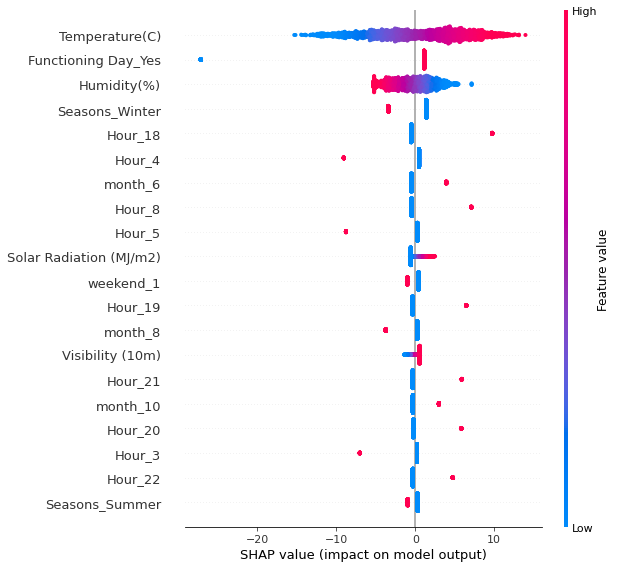

In [449]:
shap.summary_plot(lin_reg_explainer1.shap_values(x_test),
                  features = x_test,
                  feature_names=x.columns)

## the obove shap summary plot shows the feature importance in predicting the Rented Bike Count . the feature importance are ranked in descending order.


## the feature temperature is having highest importance and snowfall is having lowest importance

### the low values of  temperature is having the negative impact whereas high values has the possitive impact

### similarly low values of feature Humidity has possitive impact on the predicted value 

### rain fall features with high values put the negative impact on the predicted value means lowering the y value

In [452]:
shap.force_plot(lin_reg_explainer1.expected_value,
                lin_reg_explainer1.shap_values(x_test[0:1]),
                feature_names=x.columns,
                out_names="Rented Bike Count", figsize=(25,3),
                link="identity")

#### In this chart, y-axis values represent predicted values for each sample and the x-axis represents 10 samples from 0-9. this plot is showing the summary of the individual features on predicting the y values we have plotted the chart for initial 100 predictions ,means for first prediction what is the impact of a particular feature , in second prediction what is the impact and so on

## the shap summary plot for gradiant boost and Xgboost

In [441]:
lin_reg_explainer2 = shap.KernelExplainer(best_model_gb.predict, shap.sample(x_train,5))

#shap.summary_plot(lin_reg_explainer2.shap_values(x_test),
                  features = x_test,
                  feature_names=x.columns)

### Gradiant Boost Summary plot

In [444]:
gbm_shap_values = shap.KernelExplainer(best_model_gb.predict,shap.kmeans(x_test,20))

  0%|          | 0/2190 [00:00<?, ?it/s]

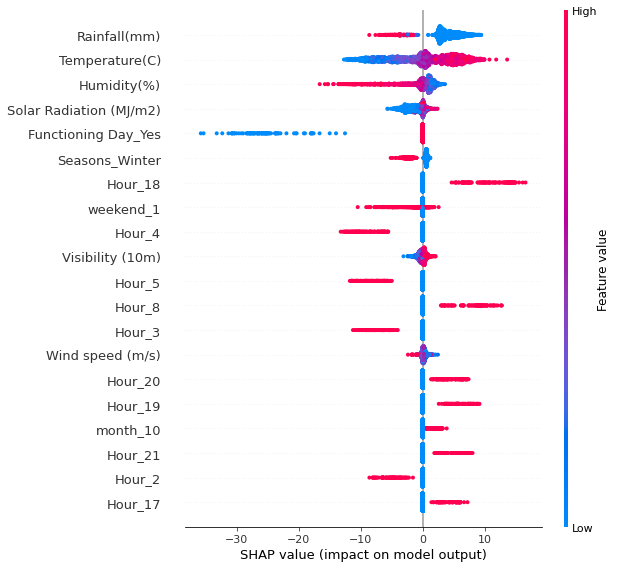

In [445]:
shap.summary_plot(gbm_shap_values.shap_values(x_test),
                  features = x_test,
                  feature_names=x.columns)

# Extreme Gradiant boost Shap Summary plot

In [447]:
xgb_shap_values = shap.KernelExplainer(best_model_xgb.predict,shap.kmeans(x_test,20))

  0%|          | 0/2190 [00:00<?, ?it/s]

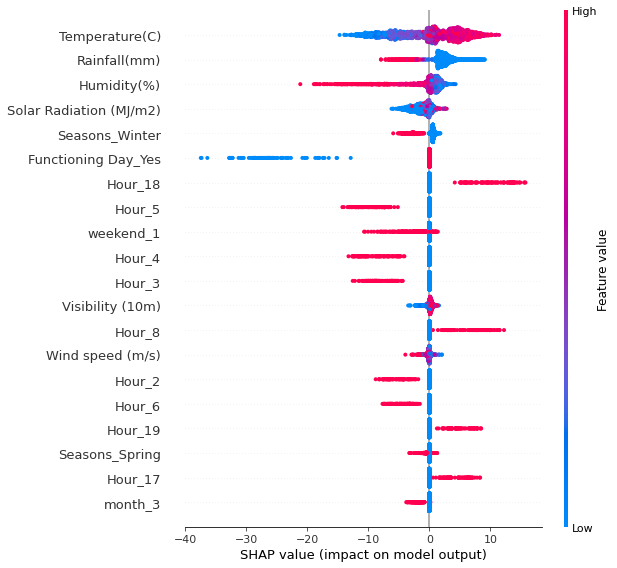

In [448]:
shap.summary_plot(xgb_shap_values.shap_values(x_test),
                  features = x_test,
                  feature_names=x.columns)

## The Temperature is the high importance feature ,high values has the positive impact on predicting dependent variable

## next are the rain fall and humidity features low values has positive impact

## solar irradiation low values puts negative impact as visibility will be low in case of low solar irradiation

## same can be obserevd for visibility feature